In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=100

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Indian_bovine_breeds",
    shuffle=True,
    image_size= IMAGE_SIZE,
    batch_size = BATCH_SIZE
)

Found 5947 files belonging to 41 classes.


In [8]:
class_names = dataset.class_names
class_names

['Alambadi',
 'Amritmahal',
 'Ayrshire',
 'Banni',
 'Bargur',
 'Bhadawari',
 'Brown_Swiss',
 'Dangi',
 'Deoni',
 'Gir',
 'Guernsey',
 'Hallikar',
 'Hariana',
 'Holstein_Friesian',
 'Jaffrabadi',
 'Jersey',
 'Kangayam',
 'Kankrej',
 'Kasargod',
 'Kenkatha',
 'Kherigarh',
 'Khillari',
 'Krishna_Valley',
 'Malnad_gidda',
 'Mehsana',
 'Murrah',
 'Nagori',
 'Nagpuri',
 'Nili_Ravi',
 'Nimari',
 'Ongole',
 'Pulikulam',
 'Rathi',
 'Red_Dane',
 'Red_Sindhi',
 'Sahiwal',
 'Surti',
 'Tharparkar',
 'Toda',
 'Umblachery',
 'Vechur']

In [6]:
len(dataset)

186

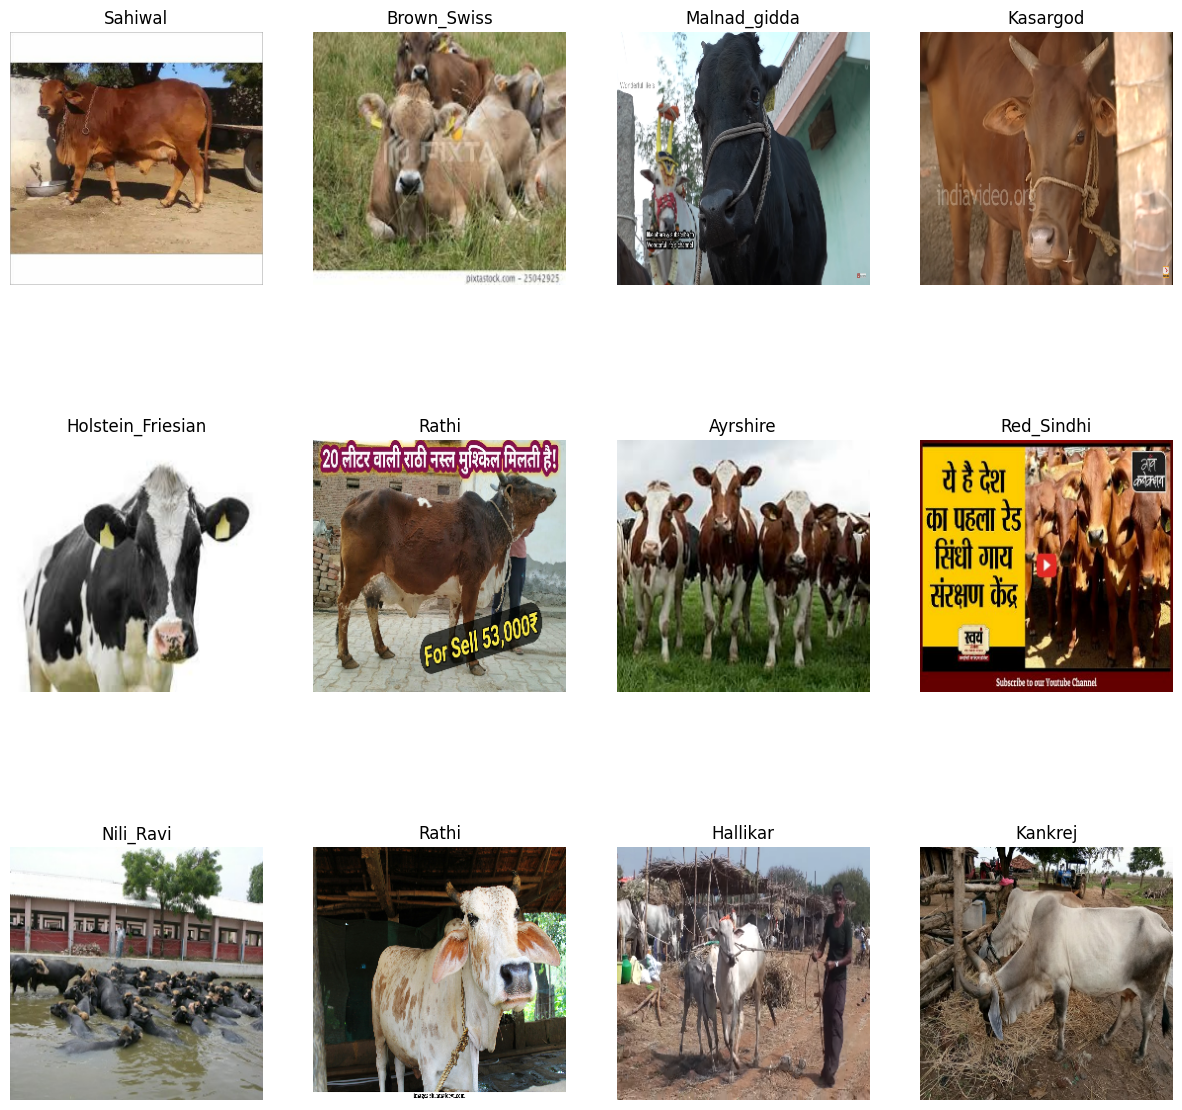

In [7]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=30000):

        ds_size = len(ds)
        if shuffle:
                ds = ds.shuffle(shuffle_size* ds_size)

        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)

        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)

        test_ds = ds.skip(train_size).skip(val_size)
        return train_ds ,val_ds, test_ds

In [10]:
get_dataset_partitions_tf(dataset)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [11]:

train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [11]:
a = len(train_ds)
b = len(val_ds)
c = len(test_ds)

print(a,b,c)

148 18 20


In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [16]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 50


model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation='softmax')
    
])

model.build(input_shape=input_shape)



c:\MLProject\CNN\cnnvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 50)               │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,802 (729.70 KB)

 Trainable params: 186,802 (729.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(

    optimizer ="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [18]:
Train = model.fit(
    train_ds,
    epochs =EPOCHS,
    batch_size = BATCH_SIZE,
    verbose =1,
    validation_data = val_ds
)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.0608 - loss: 3.6612 - val_accuracy: 0.0731 - val_loss: 3.5431
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.1014 - loss: 3.4623 - val_accuracy: 0.1068 - val_loss: 3.3217
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.1337 - loss: 3.3011 - val_accuracy: 0.1402 - val_loss: 3.2114
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.1351 - loss: 3.2110 - val_accuracy: 0.1461 - val_loss: 3.1468
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.1434 - loss: 3.1560 - val_accuracy: 0.1326 - val_loss: 3.1625
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.1467 - loss: 3.1196 - val_accuracy: 0.1486 - val_loss: 3.0921
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.1554 - loss: 3.0848 - val_accuracy: 0.1755 - val_loss: 3.0380
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.1636 - loss: 3.0202 - 

In [4]:
import numpy as np 
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("image to predict")
    plt.imshow(first_image)

    print("Actual label:" ,class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted image:",class_names[np.argmax(batch_prediction[0])])

    confidence_score = round(100 * np.max(batch_prediction[0]), 2)
    print("Confidence Score: ", confidence_score,"%")


NameError: name 'test_ds' is not defined

In [15]:
import os
model_version = 1
save_dir = f'AnimalModel{model_version}'
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, 'model.h5')

In [16]:
model.save(model_path)
print(f"Model saved at {model_path}")

Model saved at AnimalModel1\model.h5


## We are loading the model becoz somehow otherwise we have to train it again which takes time

In [17]:
import tensorflow
from tensorflow.keras.models import load_model
import pickle 
import numpy as np

In [18]:
# Load model

model = load_model("AnimalModel1/model.h5")

model.compile(

    optimizer ="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

image to predict
Actual label: Ongole
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted image: Khillari
Confidence Score:  23.45 %


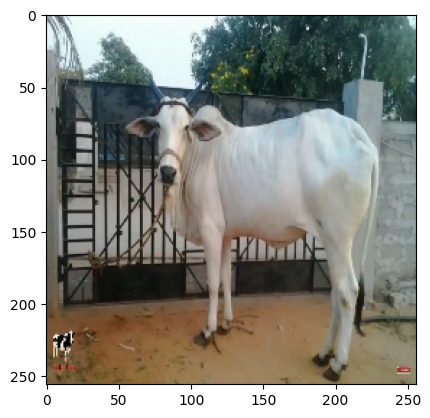

In [31]:


import numpy as np 
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("image to predict")
    plt.imshow(first_image)

    print("Actual label:" ,class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted image:",class_names[np.argmax(batch_prediction[0])])

    confidence_score = round(100 * np.max(batch_prediction[0]), 2)
    print("Confidence Score: ", confidence_score,"%")
